# Forecasting Customer Churn for Nexus Telecommunication Company


## Trương Thị An Hải
### 17/08/2021

In this challenge, you are going to help Nexus Telecommunication Company understand and predict customer churn based on information about their account.
The data consist of 19 predictors such as number of customer service calls, the area code, and usage duration collected during one month. The outcome is whether the customer churned (cancelled his plan) after that month.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

training_set = pd.read_csv('G:/[FG3] DS Test_2021_TelcoChurn/data/train.csv')
testing_set = pd.read_csv('G:/[FG3] DS Test_2021_TelcoChurn/data/test.csv')

### Exploratory Data Analysis

In the first part of EDA the data frame is evaluated for structure, columns included, and data types. The goals of this step are to get a general understanding of the data set, check domain knowledge, and get first ideas on topics to investigate. 

In [2]:
# Show the features (=columns) and first data entries of the data frame.
training_set.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [3]:
# Get a summary on the data frame: data types, shape and memory storage.
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [4]:
# Get statistical information on numerical features.
training_set.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



The unique values for every feature are printed to the console to get a deeper understanding of the feature values.

In [5]:
# Looping through the columns to get unique values per column.
for i in training_set.columns:
    print(f"Unique {i}'s count: {training_set[i].nunique()}")
    print(f"{training_set[i].unique()}\n")

Unique state's count: 51
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Unique account_length's count: 212
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 1

In [6]:
# Counting the number of missing values.
training_set.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### Data Exploration

In [7]:
# Apply the Fivethirtyeight style to all plots.
plt.style.use("fivethirtyeight")

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\python\python.exe -m pip install --upgrade pip' command.


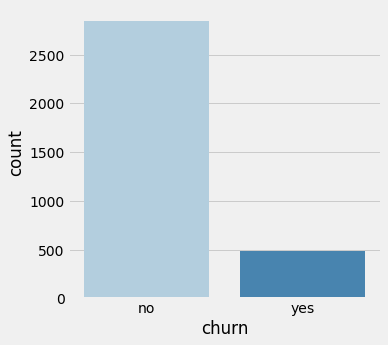

In [10]:
import seaborn as sns
# Display a frequency distribution for churn. 
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=training_set['churn'], palette="Blues", linewidth=1)
plt.show()

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.

In [11]:
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236],
        7: [311,312,313,314,315,316,317], 8: [321,322,323,324,325,326,327,328], 9: [331,332,333,334,335,336,337,338,339]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(10*columns, 10*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

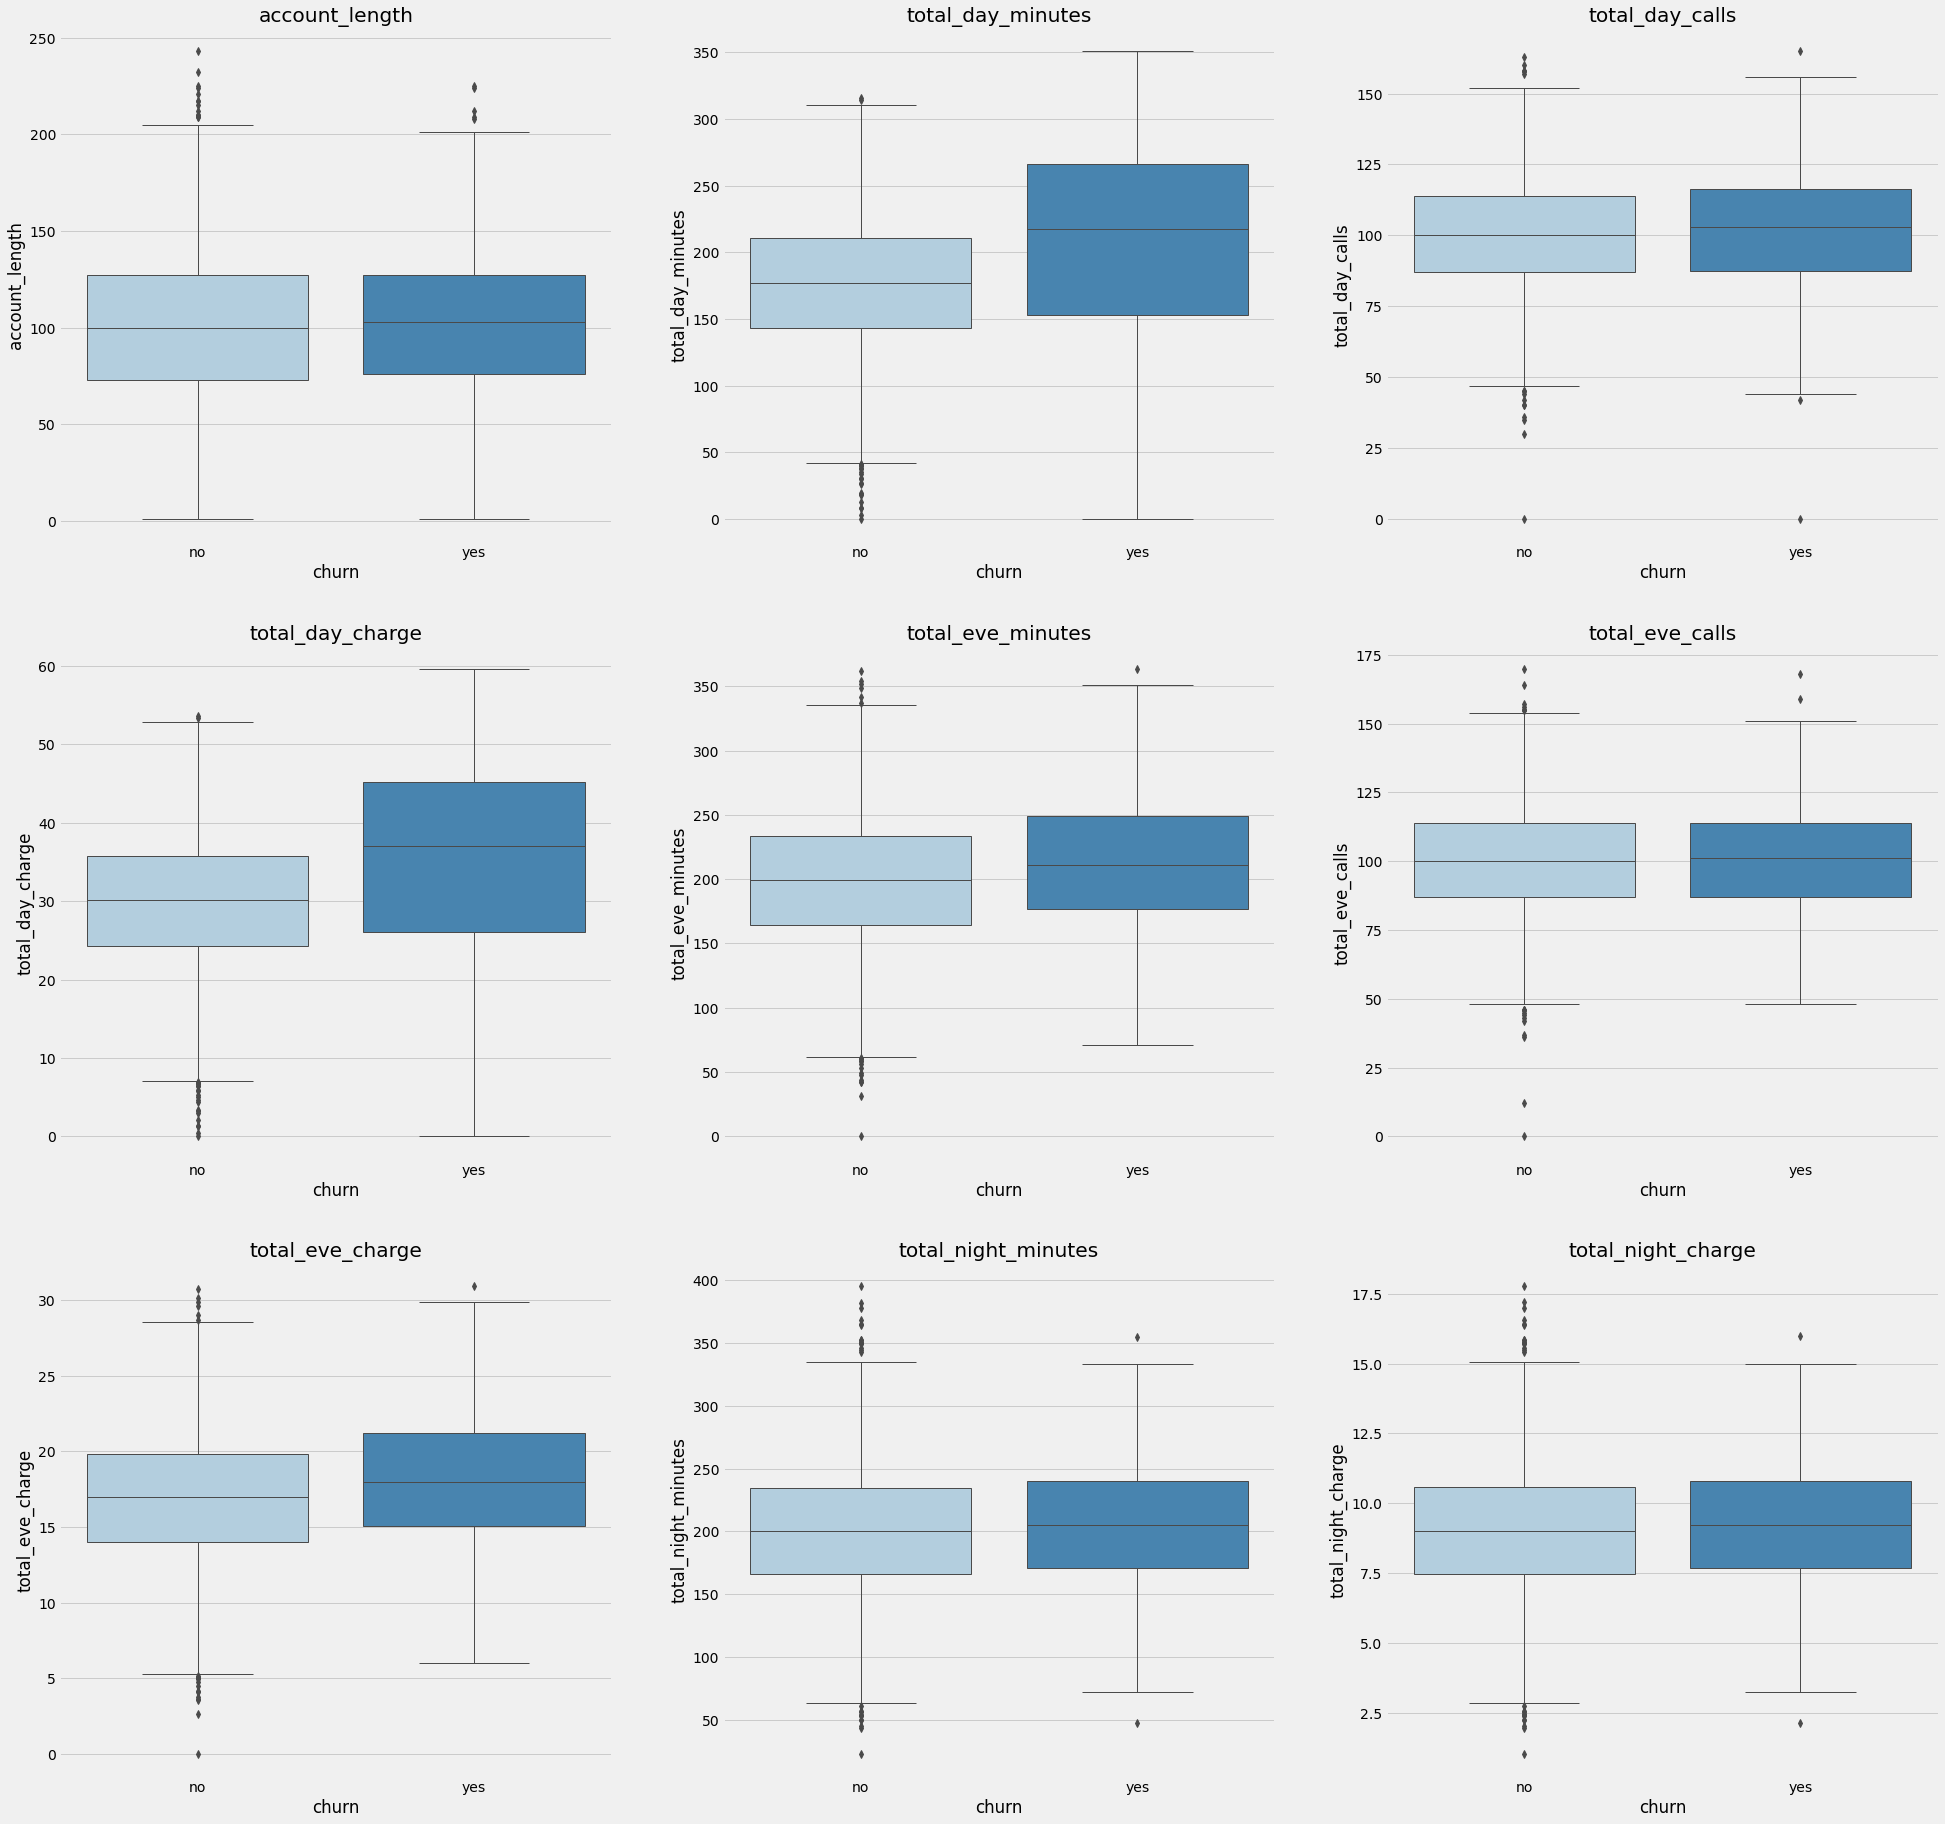

In [12]:
# Generate boxplots 
boxplot("churn", ["account_length",
"total_day_minutes",
"total_day_calls",
"total_day_charge",
"total_eve_minutes",
"total_eve_calls","total_eve_charge",
"total_night_minutes",
"total_night_charge"], training_set)

##### Plot insights:

+ Churning customers have higher total_day_charge with a median of ca. 38 compared to a median of non-churners of ca. 30.
+ The same with total_eve_charge and total_day_minutes
+ The other features have the same churn rate and non-churn

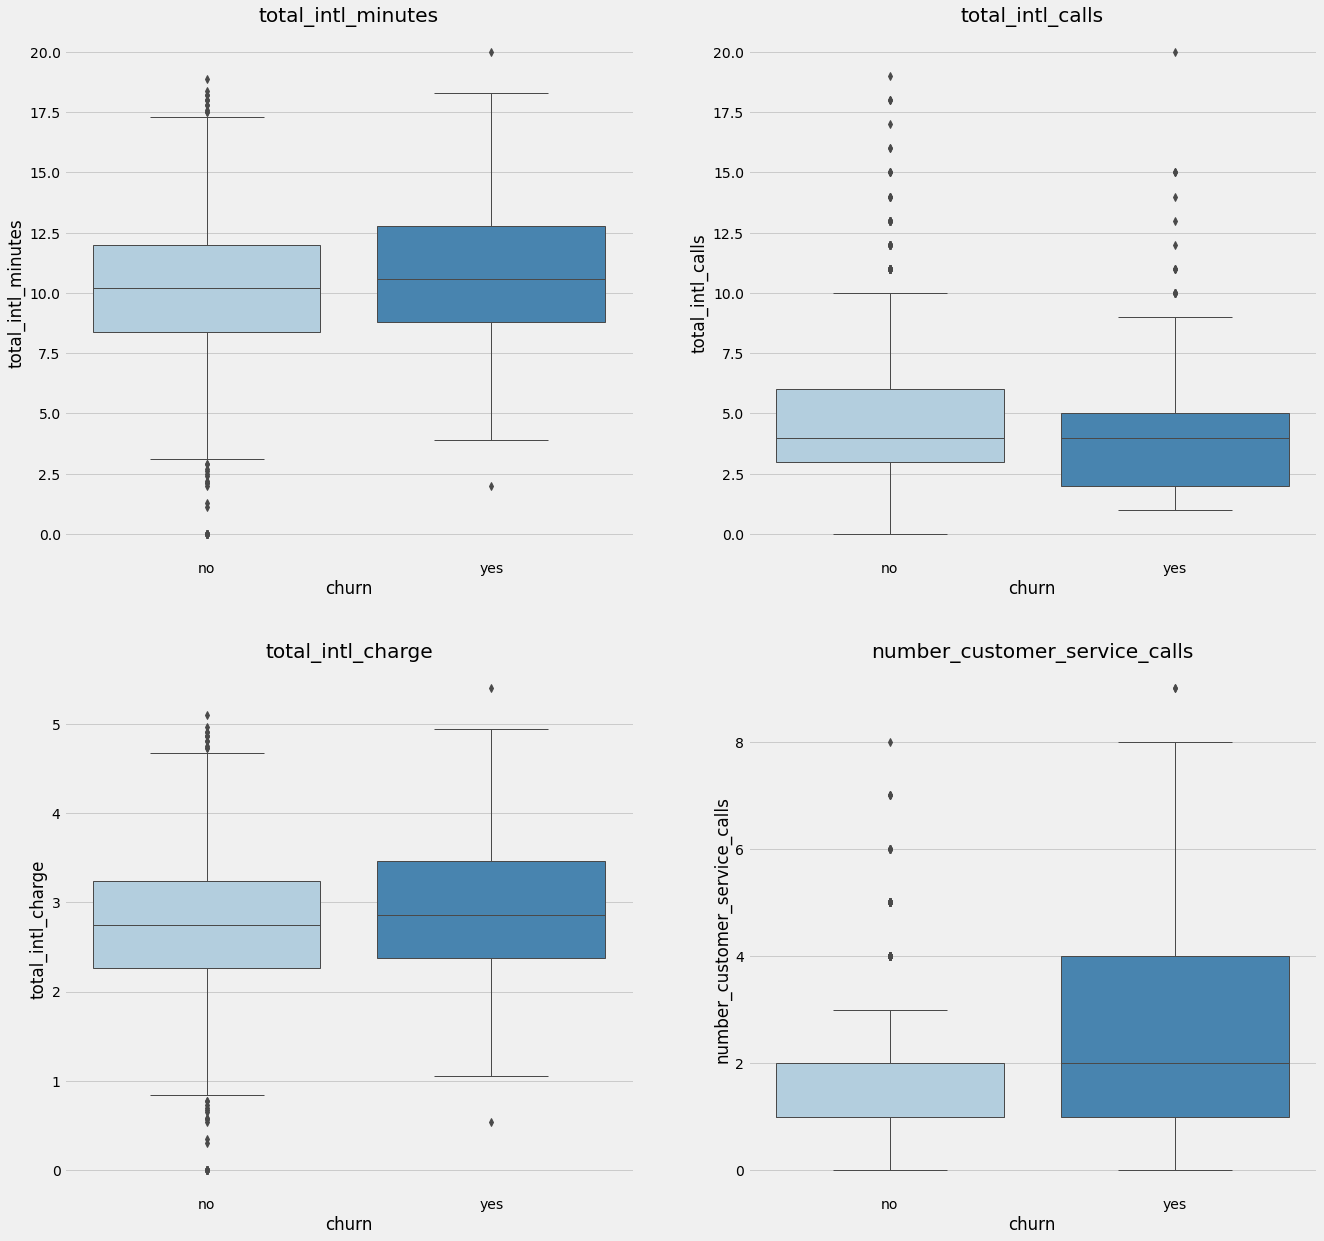

In [13]:
boxplot("churn", ["total_intl_minutes",
"total_intl_calls",
"total_intl_charge","number_customer_service_calls"], training_set)

In [14]:
# Create a function to generate countplots:
def countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

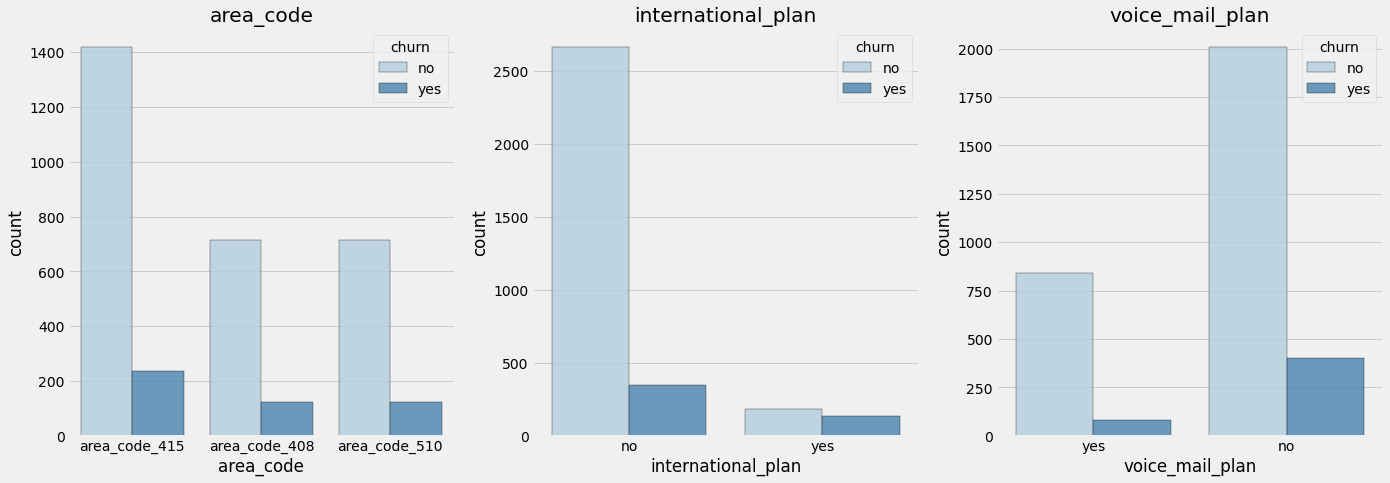

In [15]:
# Generate countplots for various features.
countplot("churn", ["area_code", "international_plan",
"voice_mail_plan" ], training_set)

###### Plot insights:
    
+ The churn rate for area_code_415 is much higher than for other area_codes.
+ Customers that have not international_plan have non-churn rate is much higher than churn rate.
+ The much higher churn rate for customers without voice_mail_plan.

In [16]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
numerical_features = ["account_length",
"total_day_minutes",
"total_day_calls",
"total_day_charge",
"total_eve_minutes",
"total_eve_calls","total_eve_charge",
"total_night_minutes",
"total_night_charge","total_intl_minutes",
"total_intl_calls",
"total_intl_charge","number_customer_service_calls"]
df_num = training_set[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

account_length                   True
total_day_minutes                True
total_day_calls                  True
total_day_charge                 True
total_eve_minutes                True
total_eve_calls                  True
total_eve_charge                 True
total_night_minutes              True
total_night_charge               True
total_intl_minutes               True
total_intl_calls                 True
total_intl_charge                True
number_customer_service_calls    True
dtype: bool

In [17]:
# Remove outliers
training_set = training_set[~((training_set < (Q1 - 1.5 * IQR)) |(training_set > (Q3 + 1.5 * IQR))).any(axis=1)]



#### Train-Test

In [18]:
# Label encoding for identified columns.

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'yes': 1, 'no': 0})
    return       

label_encoding(['international_plan', 'voice_mail_plan', 'churn'], training_set)
training_set['area_code'] = training_set['area_code'].map({'area_code_408': 0, 'area_code_415': 1, 'area_code_510' : 2})
training_set['state'] = pd.factorize(training_set.state)[0]

label_encoding(['international_plan', 'voice_mail_plan', 'churn'], testing_set)
testing_set['area_code'] = testing_set['area_code'].map({'area_code_408': 0, 'area_code_415': 1, 'area_code_510' : 2})
testing_set['state'] = pd.factorize(testing_set.state)[0]

In [19]:
from sklearn.model_selection import train_test_split

X1 = training_set.drop('churn', axis=1)
X = X1.values
y = training_set['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Selection, Training, Prediction and Assessment

For performance assessment of the chosen models, various metrics are used:

- **Feature weights**: Indicates the top features used by the model to generate the predictions
- **Confusion matrix**: Shows a grid of true and false predictions compared to the actual values
- **Accuracy score**: Shows the overall accuracy of the model for the training set and test set
- **ROC Curve**: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false-positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50%, or 90% resulting in a prediction of churn)
- **AUC (for ROC)**: Measures the overall separability between classes of the model related to the ROC curve
- **Precision-Recall-Curve**: Shows the diagnostic ability by comparing false positive rate (FPR) and false-negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high-class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance
- **F1 Score**: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.
- **AUC (for PRC)**: Measures the overall separability between classes of the model related to the Precision-Recall curve

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [21]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [22]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [23]:
# Define a function that plots the ROC curve and the AUC score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [24]:
# Define a function that plots the precision-recall-curve and the F1 score and AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

In the beginning we will test out several models and measure their performance by several metrics. Those models will be optimized in a later step by tuning their hyperparameters. The models used include:

- **K Nearest Neighbors** - fast, simple and instance-based
- **Logistic Regression** - fast and linear model
- **Random Forest** - slower but accurate ensemble model based on decision trees
- **Support Vector Machines** - slower but accurate model used here in the non-linear form

#### K Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciate and train the KNN classifier based on the training set.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained classifier on the test set.
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

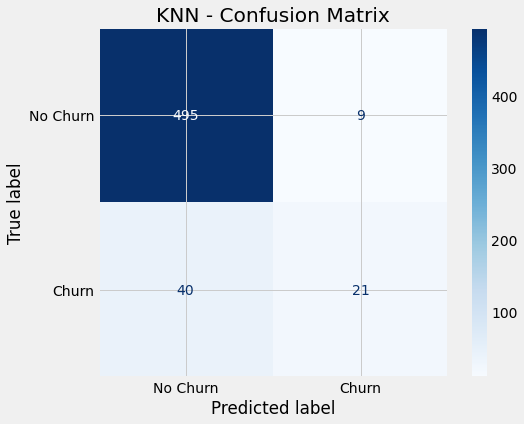

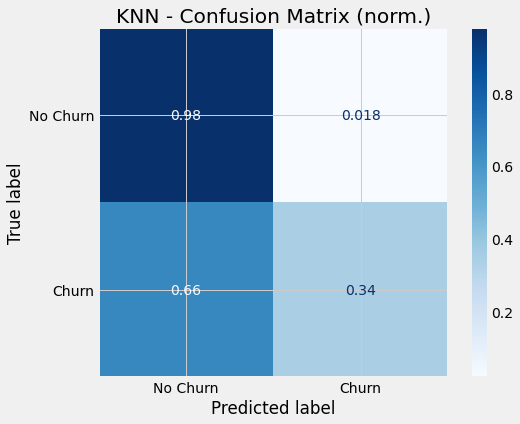

Accuracy Score Test: 0.9132743362831859
Accuracy Score Train: 0.9260407440212578 (as comparison)



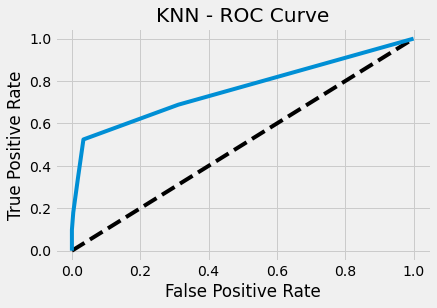

AUC Score (ROC): 0.7608476450689564



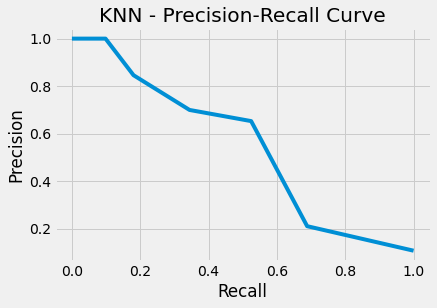

F1 Score: 0.4615384615384615 
AUC Score (PR): 0.5432665889778451



In [26]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

# Instanciate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

f:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [28]:
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

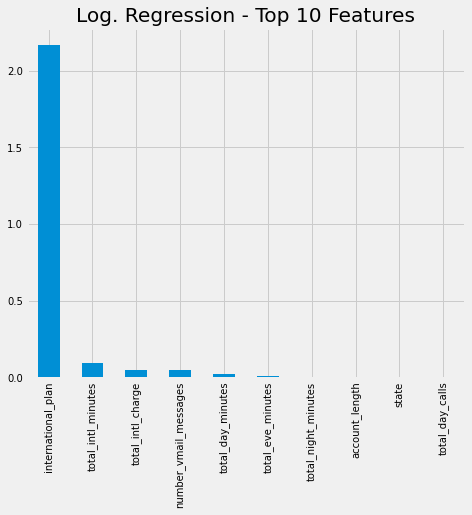

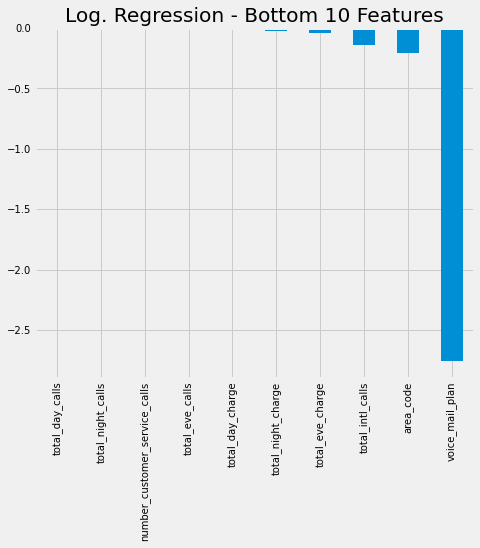

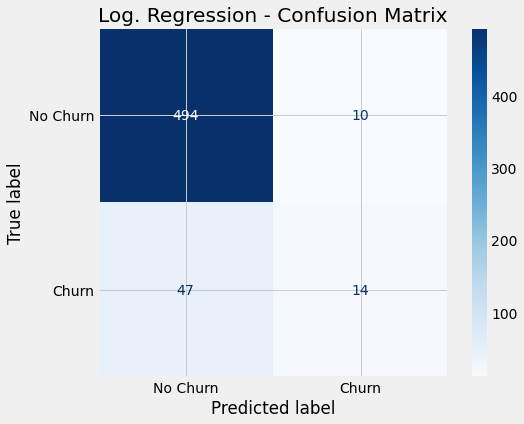

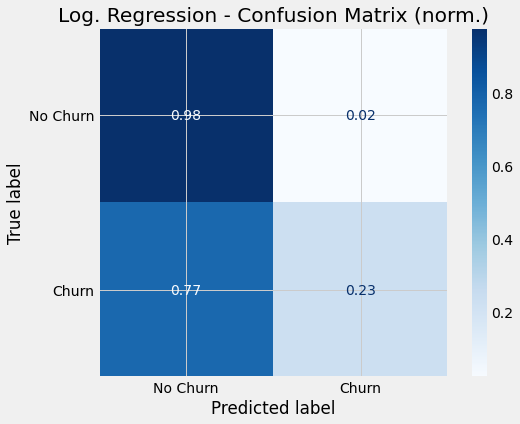

Accuracy Score Test: 0.8991150442477877
Accuracy Score Train: 0.9078830823737821 (as comparison)



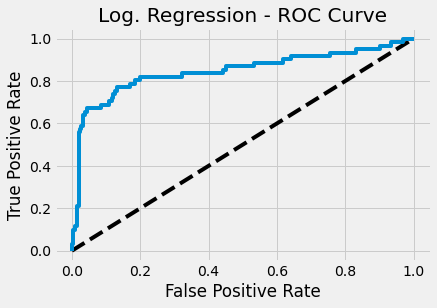

AUC Score (ROC): 0.8456284153005466



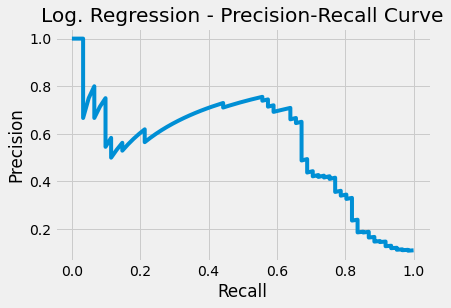

F1 Score: 0.32941176470588235 
AUC Score (PR): 0.5475759877048114



In [29]:
# Plot model evaluations.
feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

#### Random Forest

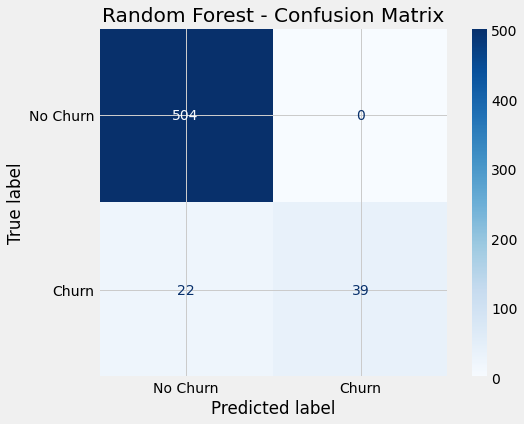

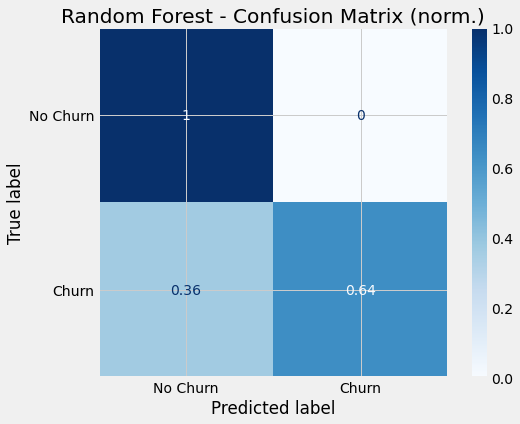

Accuracy Score Test: 0.9610619469026549
Accuracy Score Train: 1.0 (as comparison)



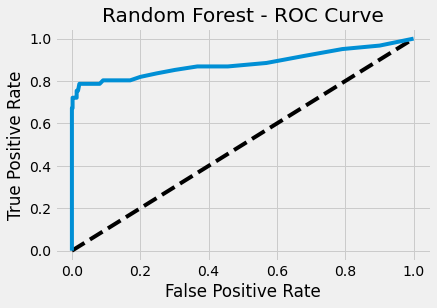

AUC Score (ROC): 0.8826762945615404



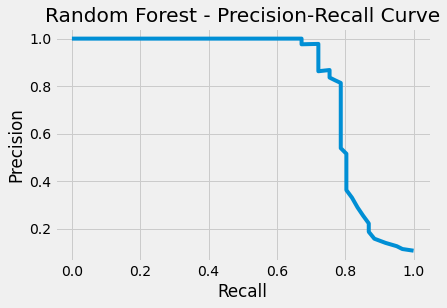

F1 Score: 0.78 
AUC Score (PR): 0.8211614662549037



In [30]:
from sklearn.ensemble import RandomForestClassifier

# Instanciate and train the random forest model based on the training set.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

#### Support Vector Machine

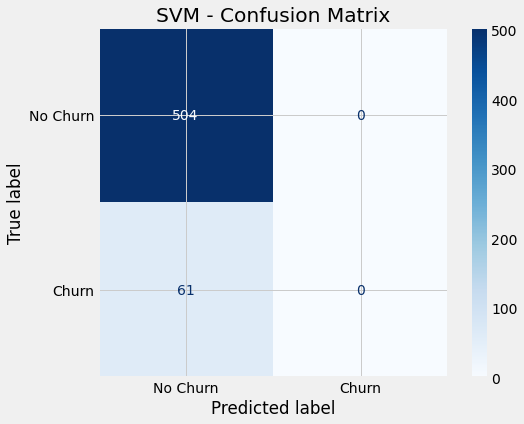

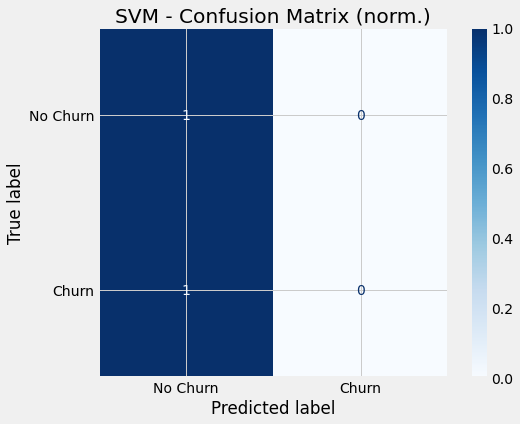

Accuracy Score Test: 0.8920353982300885
Accuracy Score Train: 0.891496899911426 (as comparison)



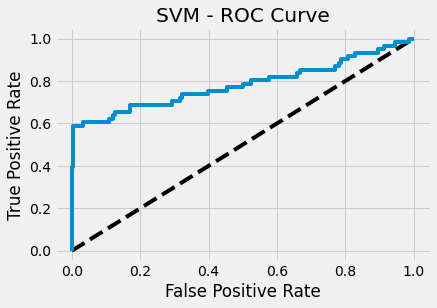

AUC Score (ROC): 0.7839578454332553



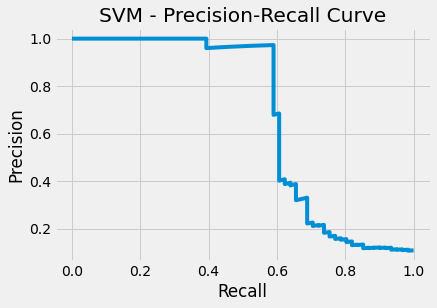

F1 Score: 0.0 
AUC Score (PR): 0.6704237021334947



In [31]:
from sklearn.svm import SVC

# Instanciate and train the SVM model on the training set.
support_vector_m = SVC(kernel='rbf', probability=True) 
support_vector_m.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

### Hyperparameter Tuning/Model Improvement

To address a potential bias stemming from the specific split of the data in the train-test-split part, cross-validation is used during hyperparameter tuning with Grid Search and Randomized Search. Cross validations splits the training data into in a specified amount of folds. For each iteration one fold is held out as "training-dev" set and the other folds are used as training set. Result of cross-validation is k values for all metrics on the k-fold CV.

#### K Nearest Neighbors (Optimized)
For KNN GridSearch CV is used to determine the optimal number of neighbors (k) leading to the best model performance.

In [32]:
from sklearn.model_selection import GridSearchCV

#Define parameter grid for GridSearch and instanciate and train model.
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 7} 



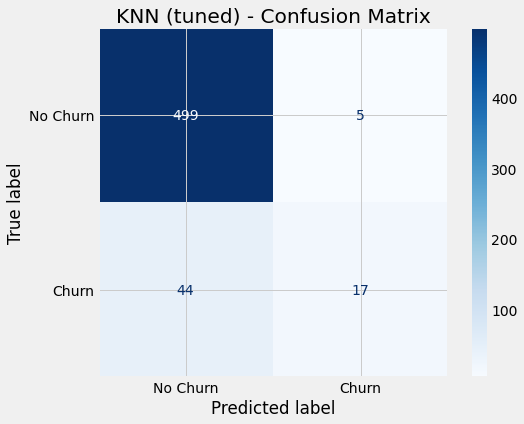

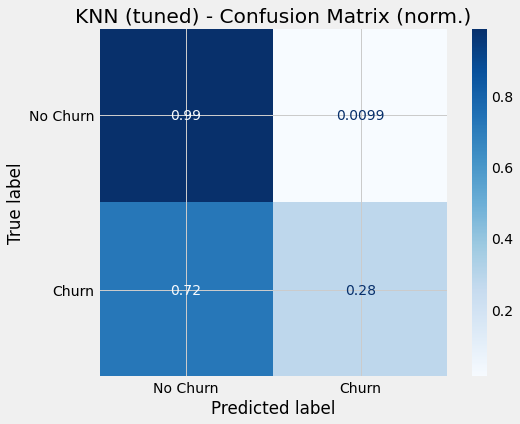

Accuracy Score Test: 0.9132743362831859
Accuracy Score Train: 0.9220549158547388 (as comparison)



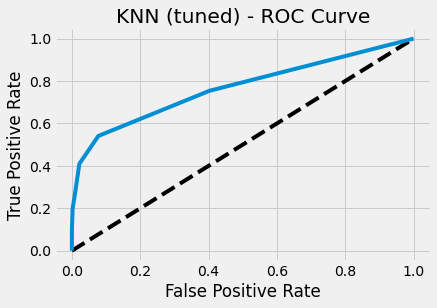

AUC Score (ROC): 0.7671903460837887



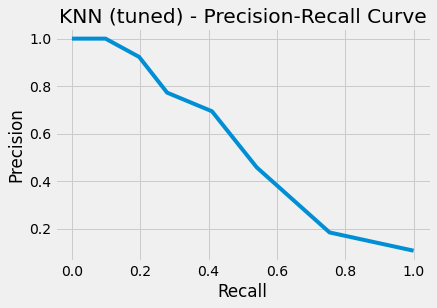

F1 Score: 0.40963855421686746 
AUC Score (PR): 0.5387505868853499



In [33]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob, 'KNN (tuned)')

#### Logistic Regression (Optimized)

For Logistice Regression GridSearchCV is used to determine the best model while applying different values of L1 or L2 regularization to turn the impact of non-meaningful feature to zero (L1) or to simplify the model by relativizing strong patterns that are picked up during training (L2).

In [34]:
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=100)   
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

f:\python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
f:\python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
f:\python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
f:\python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
f:\python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
f:\python\

Logistic Regression - Best Parameters:  {'C': 0.1, 'penalty': 'l1'}


f:\python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


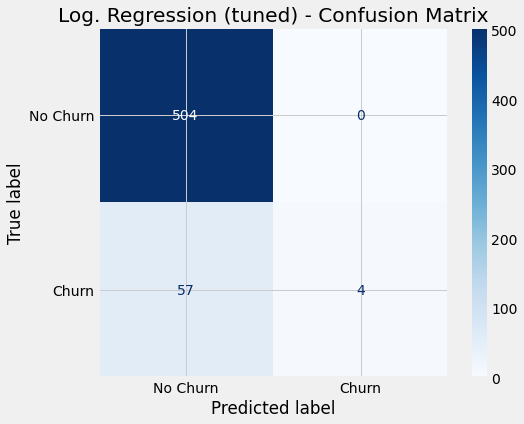

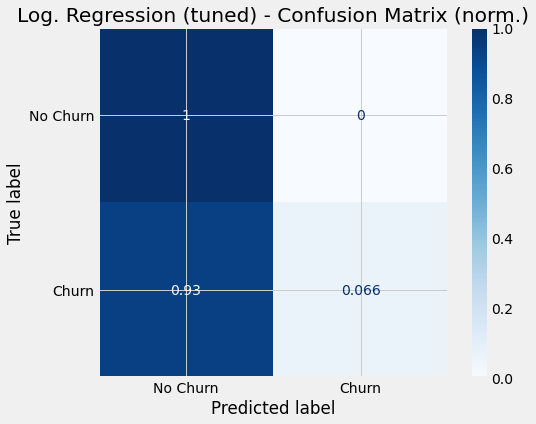

Accuracy Score Test: 0.8991150442477877
Accuracy Score Train: 0.8937112488928255 (as comparison)



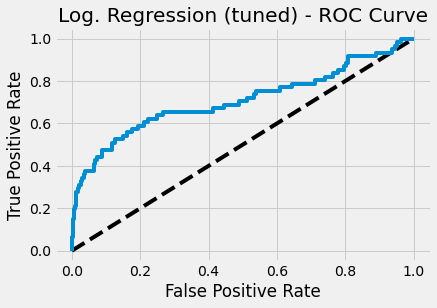

AUC Score (ROC): 0.708463440020817



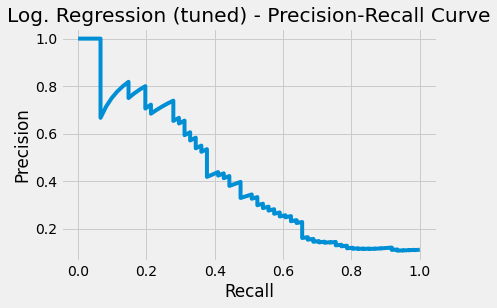

F1 Score: 0.12307692307692307 
AUC Score (PR): 0.41759922462141574



In [35]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')

#### Random Forest (Optimized)

For the Random Forest model RandomizedSearchCV is used to optimize for several hyperparameters including n_estimators, max_features, max_depth, criterion and bootstrap.

In [36]:
from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 1710, 'max_features': 'sqrt', 'max_depth': 130, 'criterion': 'gini', 'bootstrap': False}


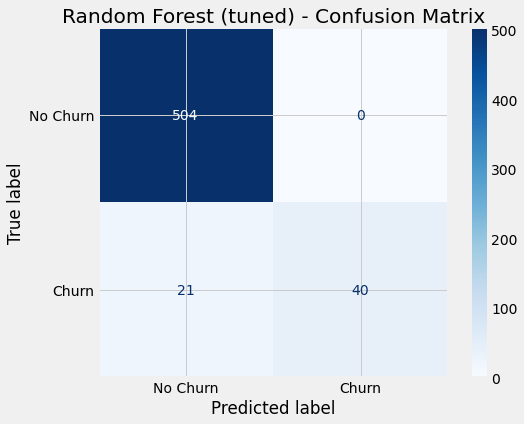

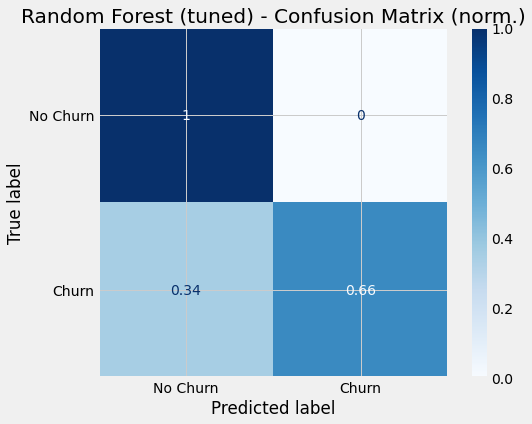

Accuracy Score Test: 0.9628318584070796
Accuracy Score Train: 1.0 (as comparison)



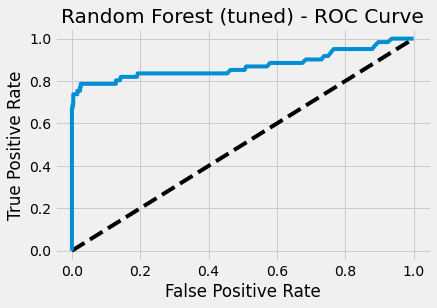

AUC Score (ROC): 0.8734549830861307



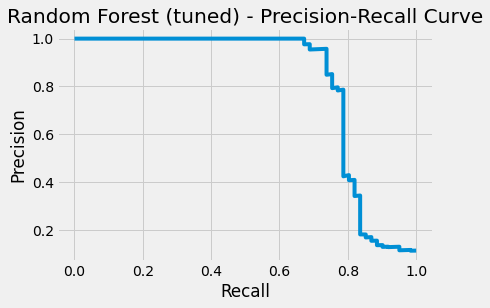

F1 Score: 0.7920792079207921 
AUC Score (PR): 0.817008170534697



In [37]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, y_pred_rf_tuned, 'Random Forest (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest (tuned)')

### Plot lift charts to compare models

In [40]:
pip install kds

You should consider upgrading via the 'f:\python\python.exe -m pip install --upgrade pip' command.


In [45]:
import kds

#### K Nearest Neighbors

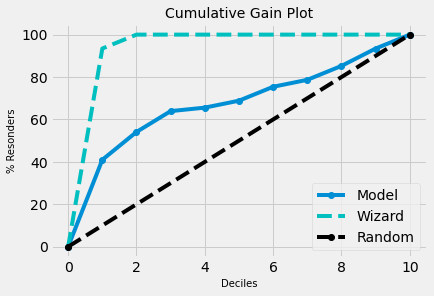

In [46]:

kds.metrics.plot_cumulative_gain(y_test, y_pred_logreg_tuned_prob[:,1])

#### Logistic Regression

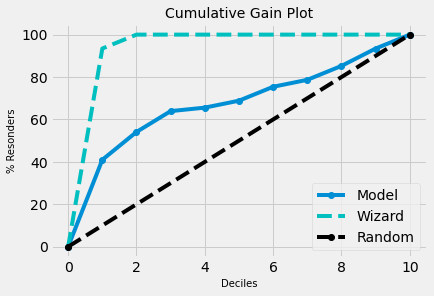

In [41]:

kds.metrics.plot_cumulative_gain(y_test,y_pred_knn_tuned_prob[:,1])

#### Random Forest

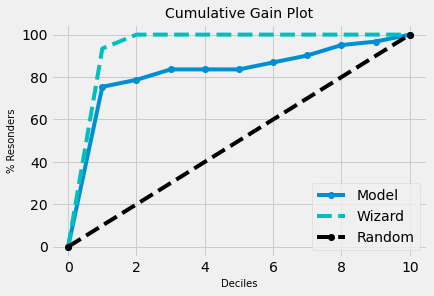

In [47]:
kds.metrics.plot_cumulative_gain(y_test,y_pred_rf_tuned_prob[:,1])

#### Support Vector Machine

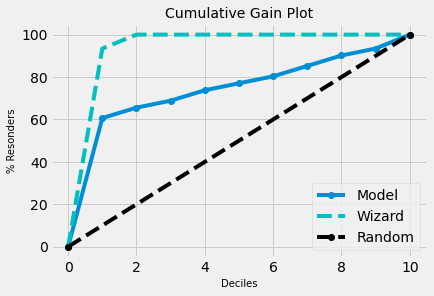

In [48]:
kds.metrics.plot_cumulative_gain(y_test,y_pred_svm_prob[:,1])

### If you wanted to find 80% of the churning customers, how many customers would have to be identified?

If you wanted to find 80% of the churning customers, you have to identify 70% of all train_set 